In [ ]:
import pandas as pd
import numpy as np

################# Machine Learning ################
import statsmodels
from statsmodels.stats.anova import anova_lm
from statsmodels.stats.outliers_influence import variance_inflation_factor

################# Data Visualization ################
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

In [ ]:
df = pd.read_csv(r"/content/Advertising.csv")
df.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


Data Pre-Processing

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   Radio       200 non-null    float64
 3   Newspaper   200 non-null    float64
 4   Sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


Removing Irrelevent Columns

In [ ]:
# Check if the 'Id' column exists before dropping it
if 'Id' in df.columns:
    df = df.drop('Id', axis=1)
    print("Column 'Id' dropped successfully.")
else:
    print("Column 'Id' not found in DataFrame.")

# Display the first few rows of the DataFrame to verify
df.head()

Column 'Id' not found in DataFrame.


,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


Identifying and Treatment of Missing Values

In [ ]:
# count the number of NaN values in each column
df.isnull().sum()

Unnamed: 0    0
TV            0
Radio         0
Newspaper     0
Sales         0
dtype: int64

dentifying And Treatment of Outliers

<Axes: >

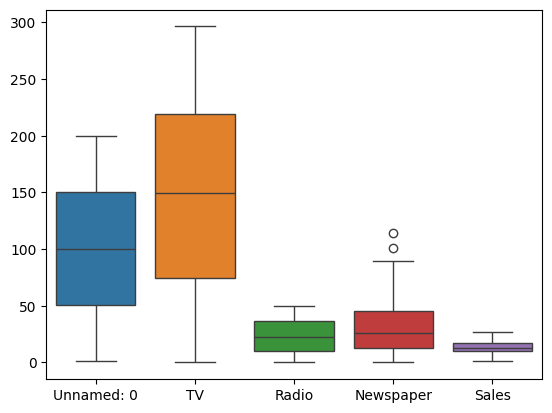

In [ ]:
sns.boxplot(data=df)

Descriptive Analysis

In [ ]:
df.describe()

,Unnamed: 0,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


In [ ]:
df.corr()

,Unnamed: 0,TV,Radio,Newspaper,Sales
Unnamed: 0,1.000000,0.017715,-0.110680,-0.154944,-0.051616
TV,0.017715,1.000000,0.054809,0.056648,0.782224
Radio,-0.110680,0.054809,1.000000,0.354104,0.576223
Newspaper,-0.154944,0.056648,0.354104,1.000000,0.228299
Sales,-0.051616,0.782224,0.576223,0.228299,1.000000


Data Visualization

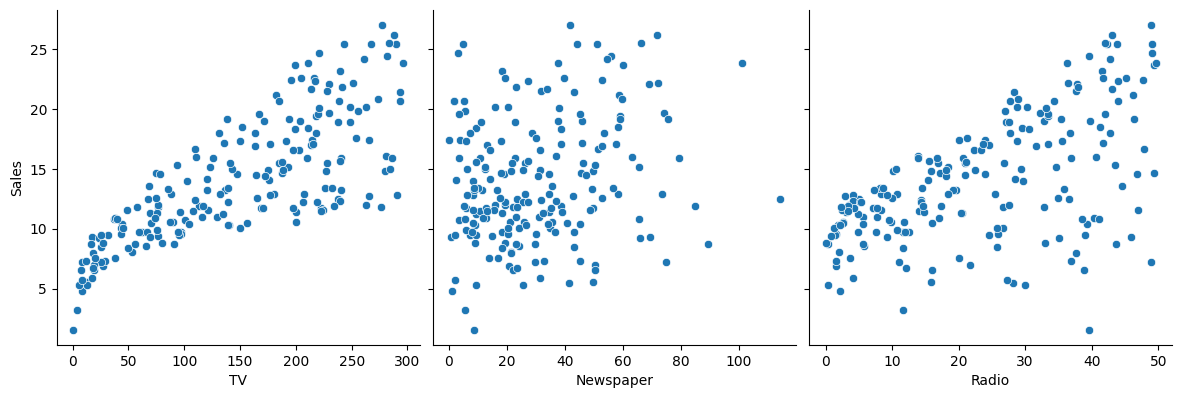

In [ ]:
# Let's see how Sales are related with other variables using scatter plot.
sns.pairplot(df, x_vars=['TV', 'Newspaper', 'Radio'], y_vars='Sales', height=4, aspect=1, kind='scatter')
plt.show()

 Assumption of Model

In [ ]:
# Assuming you want to create a linear regression model
import statsmodels.formula.api as sm

# Define your model (replace 'Sales ~ TV + Radio + Newspaper' with your actual formula)
model2 = sm.ols('Sales ~ TV + Radio + Newspaper', data=df).fit()

df['fitted_value'] = model2.fittedvalues  # Predicted Value
df['residual'] = model2.resid  # Error
df.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales,fitted_value,residual
0,1,230.1,37.8,69.2,22.1,20.523974,1.576026
1,2,44.5,39.3,45.1,10.4,12.337855,-1.937855
2,3,17.2,45.9,69.3,9.3,12.307671,-3.007671
3,4,151.5,41.3,58.5,18.5,17.597830,0.902170
4,5,180.8,10.8,58.4,12.9,13.188672,-0.288672


Linearity

<Axes: title={'center': 'Sales vs TV'}, xlabel='TV', ylabel='Sales'>

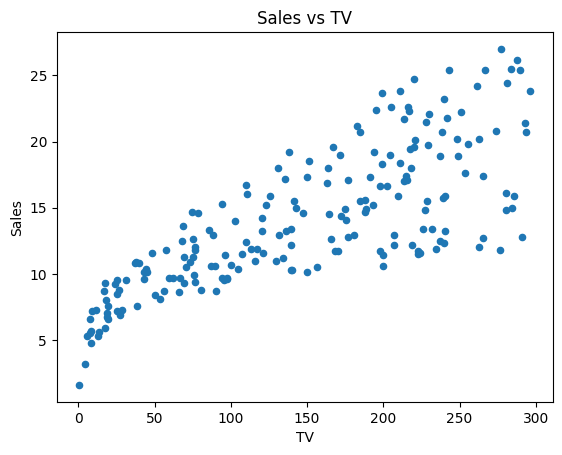

In [ ]:
df.plot.scatter(x='TV', y='Sales', title='Sales vs TV')

<Axes: ylabel='Frequency'>

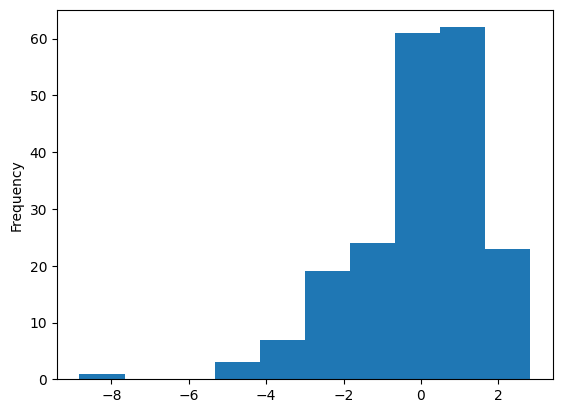

In [ ]:
df['residual'].plot.hist()

Train Accuracy


In [ ]:
from sklearn.metrics import r2_score
r2 = r2_score(df.Sales, df.fitted_value)
print('R2 score for model Performance on Test', np.round(r2,2))

R2 score for model Performance on Test 0.9


Test Accuracy

In [ ]:
from sklearn.metrics import r2_score
import pandas as pd # Import pandas to work with DataFrames
import numpy as np # Import the NumPy library

# Update the file path to the correct location of your CSV file
file_path = '/content/Advertising.csv'  # Replace with the actual file path
df_test = pd.read_csv(file_path)

# Verify the column names in your DataFrame
print(df_test.columns)

# Initialize 'predictions' with some values.
# Replace this with your actual model predictions.
predictions = [0] * len(df_test) # Example: a list of zeros

# Add the predictions to the DataFrame
df_test['predicted_sales'] = predictions

r2 = r2_score(df_test['Sales'], df_test['predicted_sales'])
print('R2 score for model Performance on Test', np.round(r2,2)) # Now you can use np.round

Index(['Unnamed: 0', 'TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')
R2 score for model Performance on Test -7.26
